# 🌍 Exploratory Data Analysis Roadmap

<div style='background-color:#212121; color:#fff; border-left: 6px solid #1976d2; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#1976d2; font-size:18px;'>Project Overview</b>

<ul>

<li>This notebook provides a step-by-step guide for robust exploratory data analysis (EDA) and feature engineering using the <b>Global Country Information Dataset (2023)</b>.</li>

<li>Whether you have a specific goal or are exploring the data for insights, this workflow will help you uncover patterns, relationships, and actionable findings for further analysis or modeling.</li>

</ul>

</div>

## 1. Data Overview

<div style='background-color:#212121; color:#fff; border-left: 6px solid #388e3c; padding: 16px; font-size: 15px; line-height: 1.7;'>

<b style='color:#388e3c; font-size:17px;'>Purpose</b>: Understand the structure and content of the dataset.
<ul>

<li>List all columns, data types, and preview sample records to get a sense of the available features and their formats.</li>

</ul>

</div>

In [8]:
import pandas as pd

df = pd.read_csv('../../data/cleaned/world_data_2023_cleaned.csv')

# List columns, types, and show a sample
print(df.info())
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    195 non-null    object 
 1   density_p_km2                              175 non-null    float64
 2   abbreviation                               188 non-null    object 
 3   agricultural_land_pct                      188 non-null    float64
 4   land_area_km2                              174 non-null    float64
 5   armed_forces_size                          157 non-null    float64
 6   birth_rate                                 169 non-null    float64
 7   calling_code                               194 non-null    float64
 8   capital_major_city                         192 non-null    object 
 9   co2_emissions                              188 non-null    float64
 10  cpi                       

,density_p_km2,agricultural_land_pct,land_area_km2,armed_forces_size,birth_rate,calling_code,co2_emissions,cpi,cpi_change_pct,fertility_rate,...,out_of_pocket_health_expenditure,physicians_per_thousand,population,population:_labor_force_participation_pct,tax_revenue_pct,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
count,175.000000,188.000000,1.740000e+02,157.00000,169.000000,194.000000,1.880000e+02,178.000000,179.000000,188.000000,...,188.000000,168.000000,1.740000e+02,176.000000,169.000000,183.000000,176.000000,1.700000e+02,194.000000,194.000000
mean,136.285714,39.117553,3.439145e+05,89490.44586,19.763018,360.546392,1.777992e+05,190.460955,6.722346,2.698138,...,32.637234,1.696012,1.844273e+07,62.738068,16.573964,40.822404,6.886364,1.064374e+07,19.092351,20.232434
std,137.690927,21.783052,4.773997e+05,128506.34115,8.677308,323.236419,8.387903e+05,397.947380,24.450414,1.282267,...,19.172697,1.353413,2.475196e+07,10.502907,6.961632,20.557662,5.079216,1.458261e+07,23.961779,66.716110
min,7.000000,0.600000,3.490000e+02,1000.00000,8.600000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,...,0.200000,0.070000,7.714200e+04,38.000000,0.000000,8.000000,0.090000,3.896400e+04,-40.900557,-175.198242
25%,40.000000,21.700000,2.822525e+04,11000.00000,11.780000,82.500000,2.304250e+03,113.885000,1.000000,1.705000,...,17.450000,0.395000,2.384412e+06,56.150000,11.700000,30.600000,3.395000,1.485626e+06,4.544175,-7.941496
50%,89.000000,39.600000,1.195110e+05,29000.00000,17.950000,255.500000,1.230300e+04,125.340000,2.300000,2.245000,...,30.700000,1.460000,8.826588e+06,62.450000,16.300000,37.200000,5.360000,4.678104e+06,17.273849,20.972652
75%,203.000000,55.375000,4.597038e+05,124000.00000,27.070000,506.750000,6.388425e+04,157.265000,4.250000,3.597500,...,43.975000,2.772500,2.570395e+07,69.500000,21.100000,48.000000,9.490000,1.111056e+07,40.124603,48.281523
max,667.000000,82.600000,2.344858e+06,634000.00000,37.910000,1876.000000,9.893038e+06,4583.710000,254.900000,6.910000,...,81.600000,4.620000,1.260140e+08,86.800000,37.200000,219.600000,28.180000,6.432484e+07,64.963051,178.065032


## 2. Summary Statistics & Distribution Visualization

<div style='background-color:#212121; color:#fff; border-left: 6px solid #fbc02d; padding: 16px; font-size: 15px; line-height: 1.7;'>

<b style='color:#fbc02d; font-size:17px;'>Purpose</b>: Explore key statistics and visualize distributions for numeric columns to identify skewness, outliers, and data quality issues.
<ul>

<li>Generate descriptive statistics, histograms, and KDE plots for main features. Use these insights to guide feature engineering and further analysis.</li>

</ul>

</div>

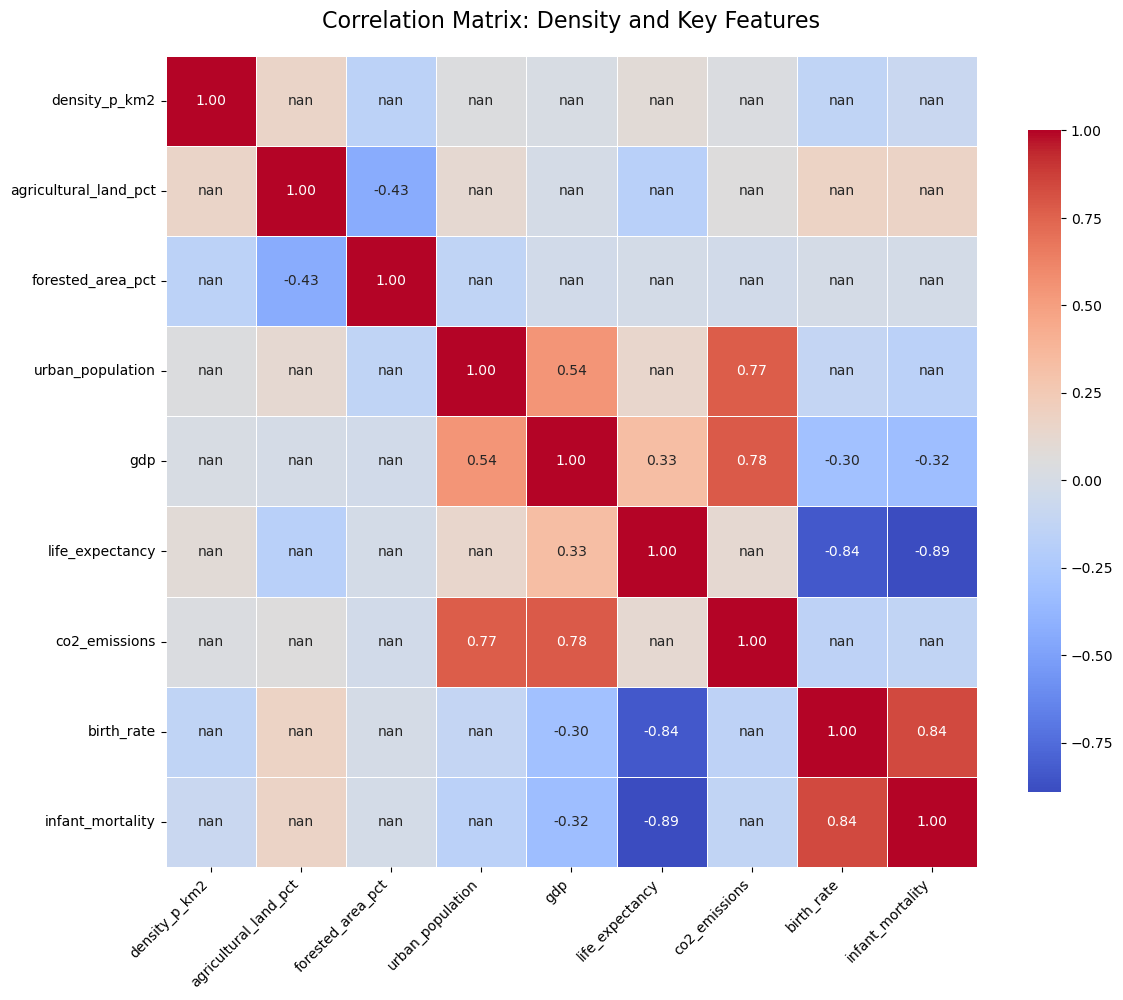

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

PLOT_PATH = "../../results/task-a/plots/"

# Get statistics for population density
density_stats = df['density_p_km2'].describe()
top_10_density = df.sort_values(by='density_p_km2', ascending=False).head(10)
bot_10_density = df.sort_values(by='density_p_km2', ascending=True).head(10)

# Correlation matrix for key features
correlation_columns = [
    'density_p_km2',
    'agricultural_land_pct',
    'forested_area_pct',
    'urban_population',
    'gdp',
    'life_expectancy',
    'co2_emissions',
    'birth_rate',
    'infant_mortality'
]

# Looking at correlations
correlation_matrix = df[correlation_columns].corr()

# Create annotation array with NaN for correlations < 0.3
annot_array = correlation_matrix.values.copy()
for i in range(len(annot_array)):
    for j in range(len(annot_array)):
        if abs(annot_array[i,j]) < 0.3:
            annot_array[i,j] = np.nan


plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=annot_array, cmap='coolwarm', fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Density and Key Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'correlation_matrix.png', dpi=300)
plt.show()

## 2.1 Key Insights: GDP and Land Use Relationships with Life Expectancy, Birth Rate, and Infant Mortality

<div style='background-color:#212121; color:#fff; border-left: 6px solid #ff9800; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#ff9800; font-size:18px;'>Exploratory Data Analysis (EDA) of Global Country Dataset (2023)</b>

<ul>

<li><b style='color:#ffd54f;'>Log Transformation of GDP:</b> Applied <code>np.log1p</code> to GDP to reduce skewness and reveal underlying patterns.</li>

<li><b style='color:#ffd54f;'>Agricultural Land % vs Forested Area %:</b> Clear negative relationship—countries with more agricultural land tend to have less forested area, and vice versa. This highlights land use trade-offs and the presence of countries with little of either (urban/desert nations).</li>

<li><b style='color:#ffd54f;'>GDP vs Life Expectancy:</b> Weak positive trend—higher GDP is generally associated with higher life expectancy, but the relationship is not strong. Other factors (healthcare, education, environment) play significant roles.</li>

<li><b style='color:#ffd54f;'>GDP vs Birth Rate:</b> Weak negative trend—countries with higher GDP tend to have lower birth rates, but the data is scattered, indicating influence from cultural and policy differences.</li>

<li><b style='color:#ffd54f;'>GDP vs Infant Mortality:</b> Strong negative relationship—higher GDP strongly correlates with lower infant mortality rates. Many countries perform better than expected, highlighting the impact of economic development on child health.</li>

</ul>

<b style='color:#ff9800;'>Summary:</b> Log-transforming GDP improves visibility of trends, but only the relationship with infant mortality is strong and clear. Life expectancy and birth rate are influenced by a broader set of factors. Land use analysis reveals important trade-offs between agriculture and forest conservation. These insights demonstrate the importance of combining statistical analysis with domain knowledge for robust EDA.

</div>

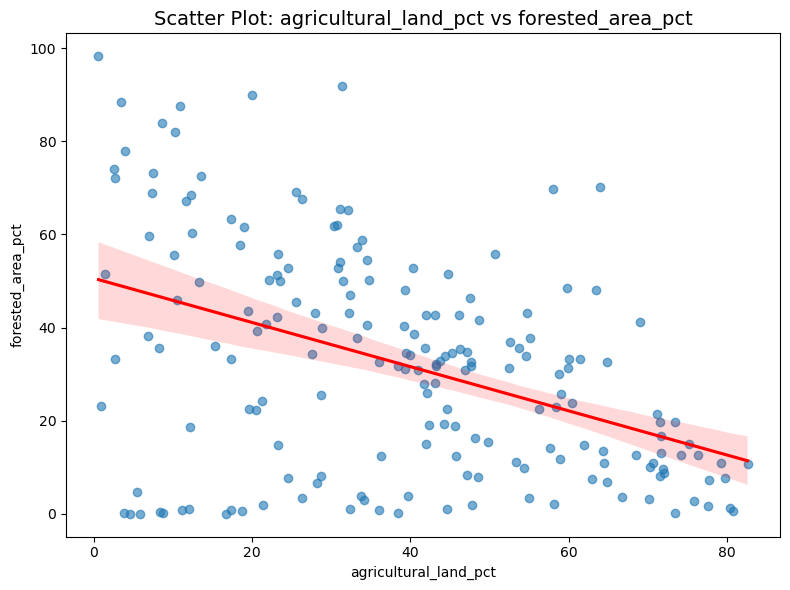

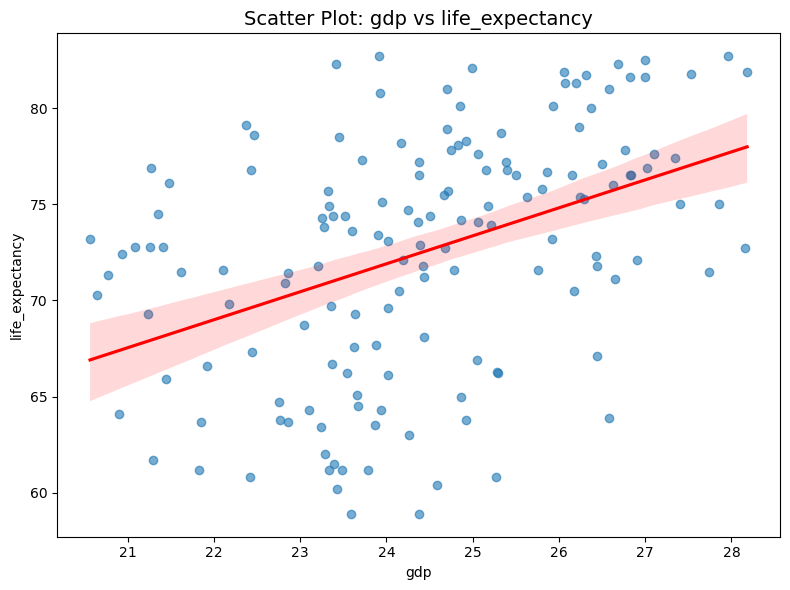

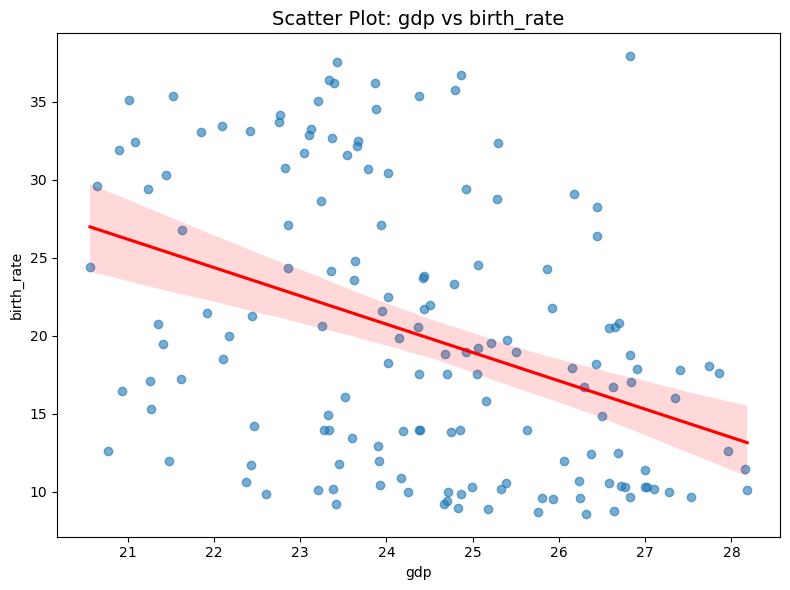

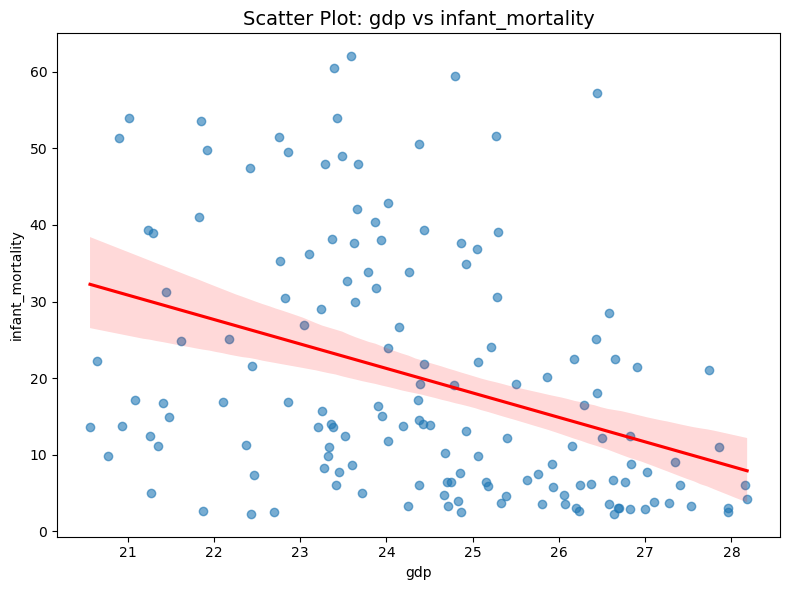

In [44]:
# Scatter plots for weak correlations
weak_corr_pairs = [
    ('agricultural_land_pct', 'forested_area_pct'),
    ('gdp', 'life_expectancy'),
    ('gdp', 'birth_rate'),
    ('gdp', 'infant_mortality')
]

# Build scatter plots
for x_col, y_col in weak_corr_pairs:
    plt.figure(figsize=(8, 6))
    if x_col == 'gdp':
        log_gdp = np.log1p(df['gdp'])
        sns.regplot(x=log_gdp, y=df[y_col], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    else:
        sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'Scatter Plot: {x_col} vs {y_col}', fontsize=14)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.savefig(PLOT_PATH + f'scatter_{x_col}_vs_{y_col}.png', dpi=300)
    plt.show()  

## 2.2 Strong correlation

In [ ]:
# Scatter plots for strong correlations
strong_corr_pairs = [
    
]